# SOU Analysis

### part a)

In [1]:
import pickle
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
%matplotlib inline

In [2]:
f = open('speeches.pkl', 'rb')
speeches = pickle.load(f)

In [3]:
# speeches is a list
# 1st index contains president, speech, & year

### Clean data

In [4]:
# define a regular expression
remove = re.compile(r"""
    (
    [\n\r\x95\x97\x80\x99\x94]  # delimiters
    |[0-9]+[a-zA-Z]+            # ordinal numbers
    |\d.                        # all digits
    |[$,+;'\]"\[%^&{}:\-()]     # metacharacters
    |[A-Z][a-z]{0,3}\.          # abbreviations
    )
""", re.VERBOSE)

In [5]:
speech_count = len(speeches)  # 226 speeches [from Washington to Obama]
address = [[]] * speech_count
presidents = []
year = []

# replace expressions w/ single whitespace
for i in range(speech_count):
    address[i] = remove.sub(' ', speeches[i][1])
    presidents.append(speeches[i][0])
    year.append(speeches[i][2])

In [6]:
f.close()

In [7]:
parsed_speeches = [[]] * speech_count

"""
1. Convert capitalcase to lowercase
2. Split each speech w/ period as separator
3. Remove empty sentences w/ filter method
4. Return list w/ sentences per speech
"""
for j in range(speech_count):
    parsed_speeches[j] = list(filter(None, address[j].lower().split('.')))


### Part b)

In [8]:
def linear_regression(X, Y):
    """Computes the linear regression."""
    
    mean_x = np.mean(X)
    mean_y = np.mean(Y)
    values = len(X)
    
    numerator = 0
    denominator = 0
    
    for i in range(values):
        numerator += (X[i] - mean_x) * (Y[i] - mean_y)
        denominator += (X[i] - mean_x) ** 2
    b1 = numerator / denominator
    b0 = mean_y - (b1 * mean_x)
    
    """Returns y-intercept and slope"""
    return [b0, b1]

In [9]:
# calculate number of sentences per address
num_sentences = np.zeros(len(parsed_speeches))
for count in range(speech_count):
    num_sentences[count] = len(parsed_speeches[count])

In [10]:
# convert year to numpy array
year = np.array(year, dtype=int)

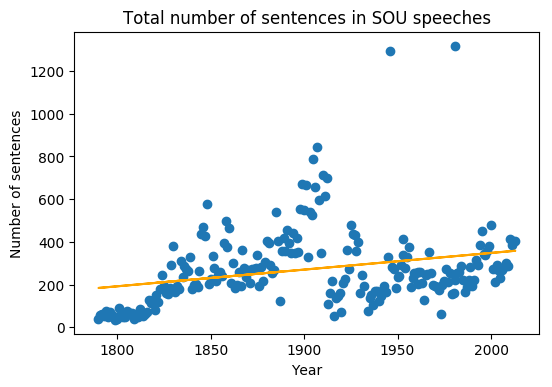

In [11]:
y_int, slope = linear_regression(year, num_sentences)
model_sentence_total = slope * year + y_int

# plotting 
plt.figure(dpi=100)
plt.plot(year, model_sentence_total, c='orange')
plt.scatter(year, num_sentences)
plt.xlabel('Year')
plt.ylabel('Number of sentences')
plt.title('Total number of sentences in SOU speeches')
plt.show()

A linear fit does not correctly gauge the trend.
<br>Nevertheless, the number of sentences throughout the years have been increasing.

In [12]:
"""
Calculate:
1. Average sentence length
2. Total words per speech
3. Longest and shortest sentences
"""

average = np.zeros(speech_count)
total_words = np.zeros(speech_count)

longest_sentence = 0
shortest_sentence = 0
tmp = 0

for i in range(len(parsed_speeches)):
    count = 0
    for j in range(len(parsed_speeches[i])):
        count += len(parsed_speeches[i][j].split())
        
        tmp = len(parsed_speeches[i][j].split())
        if longest_sentence < tmp:
            longest_sentence = tmp
            
        else:
            shortest_sentence = tmp
            
    total_words[i] = count
    average[i] =  total_words[i] / len(parsed_speeches[i])
    

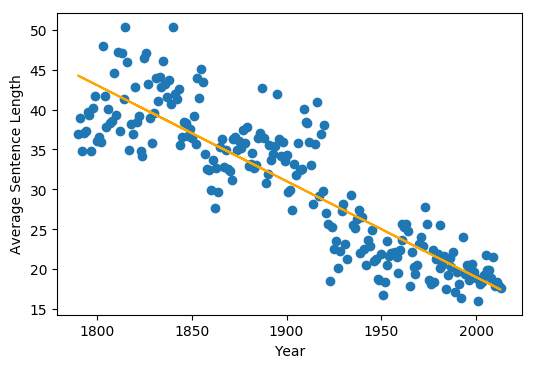

In [13]:
sentence_parameters = linear_regression(year, average)
model_sentence_avg = sentence_parameters[1] * year + sentence_parameters[0]

# plotting 
plt.figure(dpi=100)
plt.scatter(year, average)
plt.plot(year, model_sentence_avg, c='orange')
plt.xlabel('Year')
plt.ylabel('Average Sentence Length')
#plt.title('Average sentence length in SOU speeches')
plt.show()

There's a decreasing trend on the average sentence length.

### Part c)

In [14]:
first_half  = np.where(year < 1913)
second_half = np.where(year > 1912)

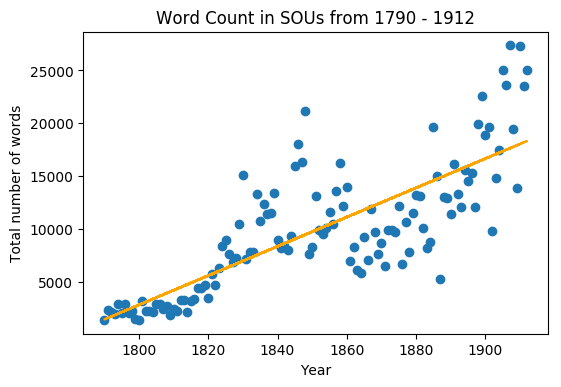

In [15]:
parameters_word_count_1st = linear_regression(year[first_half[0]], total_words[first_half])
model_word_count_1st = parameters_word_count_1st[1] * year[first_half[0]] + parameters_word_count_1st[0]

# plotting 
plt.figure(dpi=100)
plt.scatter(year[first_half[0]], total_words[first_half])
plt.plot(year[first_half[0]], model_word_count_1st, c='orange')
plt.xlabel('Year')
plt.ylabel('Total number of words')
plt.title('Word Count in SOUs from 1790 - 1912')
plt.show()

Sentences are getting shorter, but the words count has been increasing.

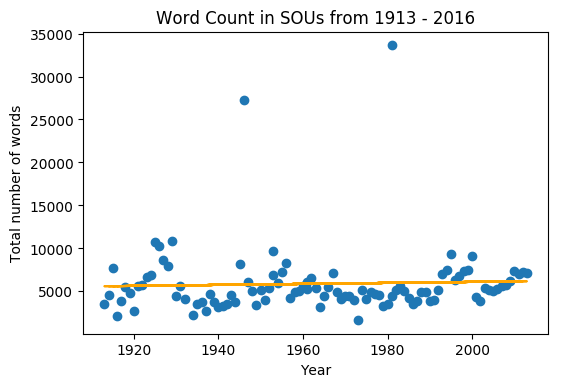

In [16]:
parameters_word_count_2nd = linear_regression(year[second_half[0]], total_words[second_half])
model_word_count_2nd = parameters_word_count_2nd[1] * year[second_half[0]] + parameters_word_count_2nd[0]

# plotting 
plt.figure(dpi=100)
plt.scatter(year[second_half[0]], total_words[second_half])
plt.plot(year[second_half[0]], model_word_count_2nd, c='orange')
plt.xlabel('Year')
plt.ylabel('Total number of words')
plt.title('Word Count in SOUs from 1913 - 2016')
plt.show()

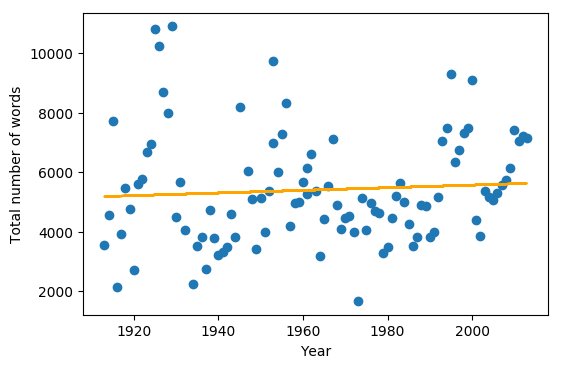

In [17]:
# remove two outliers
outliers = np.where(total_words[second_half] > 2e4)
clean_year = np.delete(year[second_half[0]], outliers)
clean_total_words = np.delete(total_words[second_half], outliers)

# new model
new_parameters = linear_regression(clean_year, clean_total_words)
new_model = new_parameters[1] * clean_year + new_parameters[0]

# plotting
plt.figure(dpi=100)
plt.scatter(clean_year, clean_total_words)
plt.plot(clean_year, new_model, c='orange')
plt.xlabel('Year')
plt.ylabel('Total number of words')
#plt.title('Word Count in SOUs from 1913 - 2016 [outliers removed]')
plt.show();

The two outliers do not allow for a proper viewing, however, it
<br>appears that word count for this period has been some what constant.
<br>Radio and television could be a factor for this. Speeches now reach the entire 
<br>country so they have to appeal to the entire spectrum.

### Part d)

In [18]:
print('The longest sentence on average is: {:.2f} words'.format(average.max()))

The longest sentence on average is: 50.40 words


In [19]:
index = np.where(average == average.max())  # np.where returns the index of what's inside the parenthesis
president_max = speeches[index[0][0]][0]
print('This corresponds to president: ', president_max)

This corresponds to president:  James Madison


In [20]:
print('The shortest sentence on average is: {:.2f} words'.format(average.min()))

The shortest sentence on average is: 16.02 words


In [21]:
index = np.where(average == average.min())
president_min = speeches[index[0][0]][0]
print('This corresponds to president: ', president_min)

This corresponds to president:  George W. Bush


In [22]:
print('The 25% quantile is: {:.2f}'.format(np.percentile(average, 25)))
print('The median is: {:.2f}'.format(np.median(average)))
print('The 75% quantile is: {:.2f}'.format(np.percentile(average, 75)))

The 25% quantile is: 21.99
The median is: 32.55
The 75% quantile is: 37.45


In [23]:
print('The longest sentence ever spoken was:', longest_sentence, 'words')
print('The shortest sentence ever spoken was: ', shortest_sentence, 'words')

The longest sentence ever spoken was: 585 words
The shortest sentence ever spoken was:  2 words


## Similiary Measure

In [24]:
start = time.time()
"""
1. Parse all SOU sentences into words where words[i]
is all the words in the ith SOU.
2. Remove words of length less than 4
"""

words = [[]] * speech_count

for i in range(speech_count):
    tmp = []
    sentence = []
    for j in range(len(parsed_speeches[i])):
        sentence.append(parsed_speeches[i][j].split())
        
        for k in range(len(sentence[j])):
            tmp.append(sentence[j][k])
    words[i] = tmp

end = time.time()
print('Runtime: {:.2f} ms for 1.8 million words'.format((end - start) * 1000))

Runtime: 872.26 ms for 1.8 million words


In [25]:
# unique - unique words per SOU
# counts - # of times unique word appears in a SOU

unique = [[]] * speech_count
counts = [[]] * speech_count

for i in range(speech_count):
    unique[i], counts[i] = np.unique(words[i], return_counts=True) 

In [26]:
# words that appear less than 80, but more than 10 times are stored
# with their appearance count. This is done per SOU.

word_appearance = [[]] * speech_count
for val in range(speech_count):
    condition = []
    condition = unique[val][(counts[val] > 10) & (counts[val] < 80)]
    word_appearance[val] = condition

In [27]:
from nltk.corpus import stopwords

In [28]:
remove = np.array(stopwords.words('english'))

In [29]:
# get unique words for the entire collection and store in pandas DataFrame
# these words are the vocabulary

series = pd.Series()
for i in range(speech_count):
    series = series.append(pd.Series(word_appearance[i]), ignore_index=True)


vocabulary = series.drop_duplicates()
vocabulary = pd.Series([word for word in vocabulary if word not in remove])

df = pd.DataFrame(vocabulary.values, columns=['Word'])

In [30]:
from collections import Counter

In [31]:
count_appearence = np.zeros((len(vocabulary), speech_count))
i = 0
start = time.time()

for words_perSOU in words:
    counter = Counter(words_perSOU)
    counter = pd.Series(counter)
    count_appearence[:, i] = counter[vocabulary].values
    i += 1

count_appearence[np.isnan(count_appearence)] = 0 
end = time.time()
print('Runtime: {:.2f} ms'.format((end - start) * 1000))

Runtime: 799.13 ms


In [32]:
# better viewing w/dataframe
df = pd.DataFrame(count_appearence, index=vocabulary)
df.index.name = 'word'
df.columns.name = 'Speech'
#df

The TF-IDF weights are given by:

$w_i(d) = n_i(d) \log\Big(\frac{|D|}{\Sigma_{d'\in D} \mathbb{1}(t_i \in d')}\Big)$

where $n_i(d)$ is the number of times term $t_i$ appears in document d, 􏰂$\Sigma_{d'\in D} \mathbb{1}(t_i \in d')$ is the number of documents that contain term $t_i$, and $|D| = 􏰂\Sigma_{d'\in D} \mathbb{1}$ is the total number of documents in the collection $D$. This weighting scheme favors terms that appear in few documents.

In [33]:
weights = np.zeros(count_appearence.shape)  # shape: (1153, 226)

"""
Calculate weights:
Columns vectors are the TF-IDF per SOU
"""

for row in range(len(vocabulary)):
    weights[row, :] = (count_appearence[row, :] * np.log(speech_count / np.count_nonzero(count_appearence[row, :])))

In [34]:
# better viewing w/dataframe
df_weights = pd.DataFrame(weights, index=vocabulary)
df_weights.index.name = 'word'
df_weights.columns.name = 'Speech'
#df_weights

### Similarity Measure between documents

sim$(d, d') = \frac{\textbf{w}(d) \cdot\textbf{w}(d')}{||\textbf{w}(d)||  ||\textbf{w}(d')||}$

In [35]:
"""
dot product between weight vectors
calculate norm of each vector
calculate similarity measure (symmetric matrix)
"""

dot_product = np.dot(weights.T, weights)
norm = np.linalg.norm(weights, axis=0)
similarity = dot_product / np.outer(norm, norm)
similarity = np.tril(similarity)

In [36]:
# pd.DataFrame(similarity)

In [37]:
# index dataframe by president and data order
original = np.arange(speech_count)
label = [presidents, original]

#### find 50 most similar pairs by different presidents

In [38]:
diff_presidents = pd.DataFrame(similarity, index=label, columns=label)
diff_presidents.index.names = ['President', 'Data Order']

In [39]:
# set pairs of same presidents to 0

pres_list = np.unique(presidents)
for i in range(len(pres_list)):
    diff_presidents.at[pres_list[i], pres_list[i]] = 0 

diff_pair = np.ravel(np.array(diff_presidents))
diff_pair.sort()
diff_pair = diff_pair[::-1][:50]  # reverse sort order and get the first 50 elements

# where are these values

location = np.zeros((50, 2))
# pairs and their values

different = []
for i in range(50):
    location[i] = np.where(diff_presidents == diff_pair[i])
    
    different.append([diff_presidents.index[int(location[i][0])], 
                      diff_presidents.index[int(location[i][1])], 
                      diff_pair[i]])
    
different = pd.DataFrame(different, columns=['President/SOU Number', 'President/SOU Number',
                                    'Similarity Value'])
different

,President/SOU Number,President/SOU Number,Similarity Value
0,"(Grover Cleveland, 85)","(Benjamin Harrison, 43)",0.719128
1,"(George Bush, 114)","(Ronald Reagan, 89)",0.706472
2,"(John Tyler, 124)","(James K. Polk, 53)",0.695176
3,"(George Bush, 177)","(William J. Clinton, 71)",0.688252
4,"(Gerald R. Ford, 218)","(Ronald Reagan, 169)",0.684655
5,"(William J. Clinton, 71)","(Barack Obama, 22)",0.682273
6,"(Grover Cleveland, 85)","(Rutherford B. Hayes, 45)",0.681560
7,"(Rutherford B. Hayes, 147)","(Grover Cleveland, 85)",0.681228
8,"(William J. Clinton, 196)","(Barack Obama, 91)",0.674405
9,"(William J. Clinton, 196)","(Barack Obama, 38)",0.672663


#### find 50 most similar pairs by same presidents

In [40]:
similarity = dot_product / np.outer(norm, norm)
similarity = np.tril(similarity)

same_president = pd.DataFrame(similarity, index=label, columns=label)
same_president.index.names = ['President', 'Data Order']

In [41]:
# get values of same president
tmp = np.array([])  #len(pres_list)
same_pair = np.array([]) 
for i in range(len(pres_list)):
    tmp = same_president.loc[pres_list[i], pres_list[i]].values.ravel()
    same_pair = np.append(same_pair, tmp)

ind = np.nonzero(same_pair)
same_pair = same_pair[ind]
same_pair = same_pair[~np.isclose(same_pair, 1)]
same_pair.sort()
same_pair = same_pair[::-1][:50]

In [42]:
# where are these values
location = np.zeros((50, 2))
# pairs and their values
same = []
for i in range(50):
    location[i] = np.where(same_president == same_pair[i])

    same.append([same_president.index[int(location[i][0])],
                 same_president.index[int(location[i][1])],
                 same_pair[i]])
    
same = pd.DataFrame(same, columns=['President/SOU Number', 'President/SOU Number',
                                    'Similarity Value'])
same

,President/SOU Number,President/SOU Number,Similarity Value
0,"(George W. Bush, 200)","(George W. Bush, 143)",0.850321
1,"(Lyndon B. Johnson, 153)","(Lyndon B. Johnson, 29)",0.831979
2,"(James Madison, 146)","(James Madison, 99)",0.807939
3,"(William J. Clinton, 66)","(William J. Clinton, 48)",0.803246
4,"(Barack Obama, 138)","(Barack Obama, 22)",0.801083
5,"(Barack Obama, 138)","(Barack Obama, 91)",0.781069
6,"(William J. Clinton, 66)","(William J. Clinton, 57)",0.780571
7,"(Dwight D. Eisenhower, 88)","(Dwight D. Eisenhower, 11)",0.764884
8,"(Barack Obama, 38)","(Barack Obama, 22)",0.761954
9,"(William J. Clinton, 222)","(William J. Clinton, 57)",0.760752


#### find 25 most similar pairs by Presidents
(averaging the cosine similiary over all pairs of their SOUs

In [43]:
#same_president.loc["Abraham Lincoln"]['Abraham Lincoln']

In [44]:
#same_president.loc["Abraham Lincoln"]['Abraham Lincoln'].values

In [45]:
#same_president_pair = same_president.loc["Abraham Lincoln"]['Abraham Lincoln'].values
#same_president_pair = same_president_pair[~np.isclose(same_president_pair, 1) & (same_president_pair != 0)]
#count = np.count_nonzero(same_president_pair)
#val = same_president_pair.sum() / count

#### Using this vector representation, cluster the speeches using k-means

In [46]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [47]:
# zero mean and unit standard deviation
norm_weights = preprocessing.normalize(weights.T)
weights_scaled = preprocessing.scale(norm_weights.T)

In [48]:
pca = PCA(n_components=2)
decomposed_weights = pca.fit_transform(weights_scaled.T)

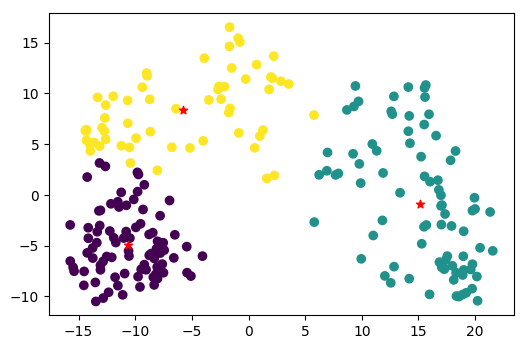

In [49]:
clusters = 3
model = KMeans(n_clusters=clusters)
SOU_clusters = model.fit(decomposed_weights)  # (n_samples, n_features)

centers = SOU_clusters.cluster_centers_
labels = SOU_clusters.labels_

# plotting
plt.figure(dpi=100)
plt.scatter(decomposed_weights[:,0], decomposed_weights[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='*')
plt.show()